In [ ]:
# Here we will do the complete EDA of all the features in the qura_cleaned_train_final.csv
import pandas as pd            # For data handling and analysis
import re                      # For regex text cleaning
from nltk.corpus import stopwords  # For stop words removal
import fuzzywuzzy              # For fuzzy string matching
import distance                # For string similarity measures
import numpy as np             # For numerical operations
from fuzzywuzzy import fuzz    # For specific fuzzy matching functions
from distance import lcsubstrings # For longest common substrings
from nltk.stem import PorterStemmer # For stemming words
from bs4 import BeautifulSoup  # For cleaning HTML tags from text
import os
from os import path
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS  # For generating word clouds
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced plotting

# Load the cleaned dataset
df = pd.read_csv("quora_cleaned_train_final.csv")


array([0, 1], dtype=int64)

In [10]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))
print(len(p))  # number of individual questions in duplicate pairs

print(len(df_duplicate))  # number of duplicate pairs

#Saving the np array into a text file

np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s', encoding='utf-8')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s', encoding='utf-8')



Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510048
298526
149263


Total number of words in duplicate pair questions : 16108377
Total number of words in non duplicate pair questions : 33180384


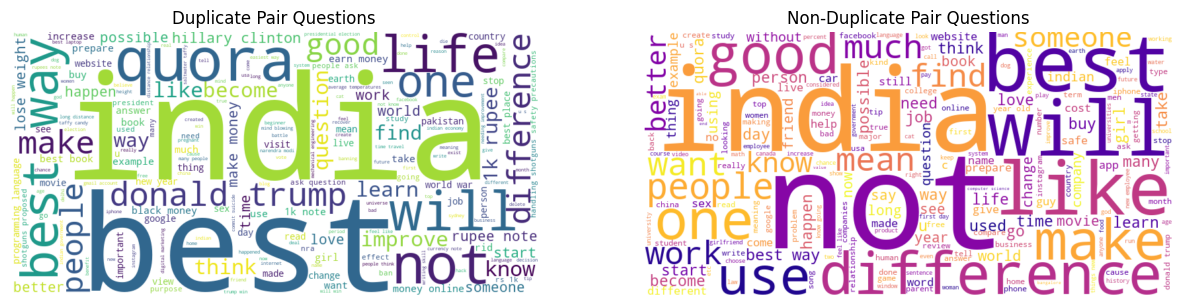

'STOPWORDS from WordCloud → already has a built-in list of common words to ignore.\n\nstopwords.add(...) → you add more words that you personally want to ignore in the analysis.\n\nstopwords.remove(...) → you take out certain words from the ignore list if you think they’re important for your analysis.\n\nSo the final stopwords set is a customized list of words that your word cloud (or any text analysis) will skip over.\n\nExample:\n\nIf "br" (HTML line break tag) is in your text, it’s useless → you add it to stopwords.\n\nIf "not" is in default stopwords, removing it means you keep it because it changes meaning (“good” vs. “not good”).'

In [33]:
# reading the text files and removing the Stop Words:
"""Reads the questions from text files.

Prepares a set of stopwords (words to ignore for text analysis).

Prints the size of the text for duplicate and non-duplicate questions. len(textp_w) and len(textn_w) actually count the number of characters in the strings, not words."""


import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from os import path

# Your existing code for reading files
d = path.dirname('.')

with open(path.join(d, 'train_p.txt'), encoding='utf-8') as f:
    textp_w = f.read()

with open(path.join(d, 'train_n.txt'), encoding='utf-8') as f:
    textn_w = f.read()

stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")
stopwords.remove("no")
stopwords.remove("like")

print("Total number of words in duplicate pair questions :", len(textp_w))
print("Total number of words in non duplicate pair questions :", len(textn_w))

# Generate wordcloud for positive (duplicate) questions
wordcloud_p = WordCloud(width=800, height=400, background_color='white',
                        stopwords=stopwords, colormap='viridis').generate(textp_w)

# Generate wordcloud for negative (non-duplicate) questions
wordcloud_n = WordCloud(width=800, height=400, background_color='white',
                        stopwords=stopwords, colormap='plasma').generate(textn_w)

# Display both word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis('off')
plt.title('Duplicate Pair Questions')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Duplicate Pair Questions')

plt.show()


"""STOPWORDS from WordCloud → already has a built-in list of common words to ignore.

stopwords.add(...) → you add more words that you personally want to ignore in the analysis.

stopwords.remove(...) → you take out certain words from the ignore list if you think they’re important for your analysis.

So the final stopwords set is a customized list of words that your word cloud (or any text analysis) will skip over.

Example:

If "br" (HTML line break tag) is in your text, it’s useless → you add it to stopwords.

If "not" is in default stopwords, removing it means you keep it because it changes meaning (“good” vs. “not good”)."""

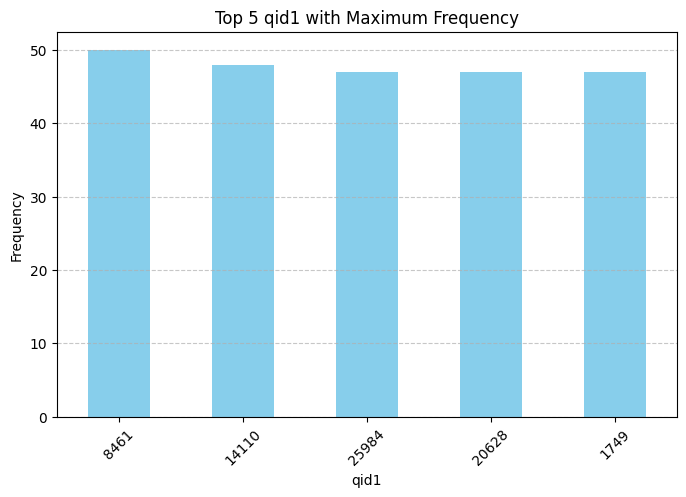

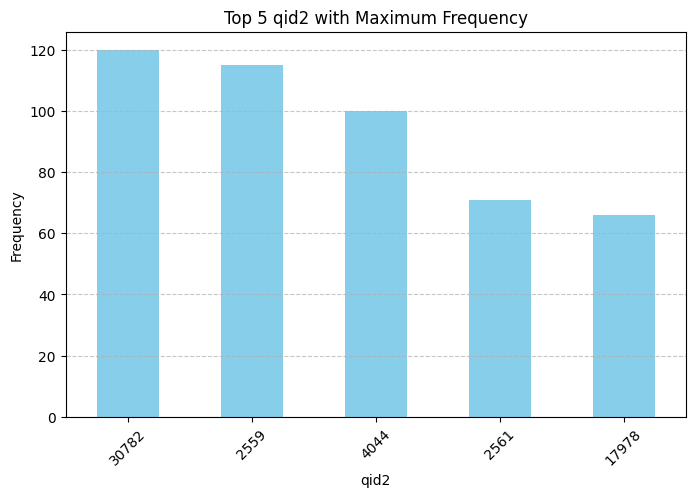

In [36]:
# Top five qids with maximum frequency
top_qid1 = df['qid1'].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 5))
top_qid1.plot(kind='bar', color='skyblue')
plt.title('Top 5 qid1 with Maximum Frequency')
plt.xlabel('qid1')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

top_qid2 = df['qid2'].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 5))
top_qid2.plot(kind='bar', color='skyblue')
plt.title('Top 5 qid2 with Maximum Frequency')
plt.xlabel('qid2')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



C:\Users\Aditya\AppData\Local\Temp\ipykernel_20352\602151189.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['q1_word_count'], df['q2_word_count']], labels=['Question 1', 'Question 2'])


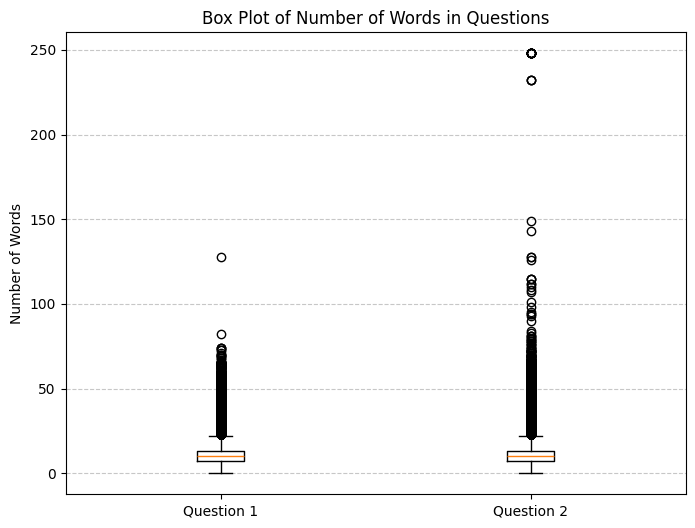

In [ ]:


# Do see the outliers and all also.
def word_count(text):
    if pd.isnull(text):
        return 0
    return len(str(text).split())

# Create new columns for number of words
df['q1_word_count'] = df['question1'].apply(word_count)
df['q2_word_count'] = df['question2'].apply(word_count)

# Plot boxplots for both questions
plt.figure(figsize=(8,6))
plt.boxplot([df['q1_word_count'], df['q2_word_count']], labels=['Question 1', 'Question 2'])
plt.title("Box Plot of Number of Words in Questions")
plt.ylabel("Number of Words")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [44]:
# Assuming your dataframe is called df
# And 'is_duplicate' column is 1 for duplicate, 0 for non-duplicate

# Count duplicates where word_share >= 0.5
dup_high_share = df[(df['word_share'] < 0.5) & (df['is_duplicate'] == 0)].shape[0]

# Count non-duplicates where word_share < 0.5
nondup_low_share = df[(df['word_share'] < 0.5) & (df['is_duplicate'] == 1)].shape[0]

print(f"Duplicates with word_share < 0.5: {dup_high_share}")
print(f"Non-duplicates with word_share < 0.5: {nondup_low_share}")


Duplicates with word_share < 0.5: 255024
Non-duplicates with word_share < 0.5: 149263


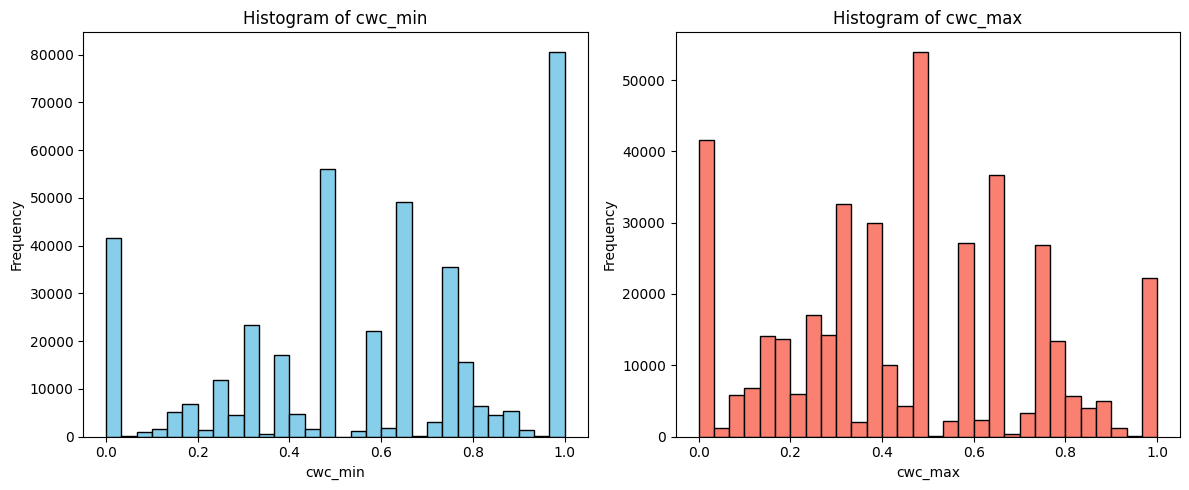

In [47]:
plt.figure(figsize=(12, 5))

# Histogram for cwc_min
plt.subplot(1, 2, 1)
plt.hist(df['cwc_min'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of cwc_min')
plt.xlabel('cwc_min')
plt.ylabel('Frequency')

# Histogram for cwc_max
plt.subplot(1, 2, 2)
plt.hist(df['cwc_max'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of cwc_max')
plt.xlabel('cwc_max')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [60]:
# Assuming df has 'fuzz_ratio' and 'is_duplicate' columns
# is_duplicate: 1 = duplicate, 0 = non-duplicate

# Count duplicates where fuzz_ratio is 100
dup_100 = df[(df['fuzz_ratio'] == 100) & (df['is_duplicate'] == 1)].shape[0]

# Count non-duplicates where fuzz_ratio is 100
nondup_100 = df[(df['fuzz_ratio'] == 100) & (df['is_duplicate'] == 0)].shape[0]

# Count duplicates where fuzz_ratio is NOT 100
dup_not_100 = df[(df['fuzz_ratio'] != 100) & (df['is_duplicate'] == 1)].shape[0]

# Count non-duplicates where fuzz_ratio is NOT 100
nondup_not_100 = df[(df['fuzz_ratio'] != 100) & (df['is_duplicate'] == 0)].shape[0]

print("Duplicates with fuzz_ratio = 100:", dup_100)
print("Non-duplicates with fuzz_ratio = 100:", nondup_100)
print("Duplicates with fuzz_ratio != 100:", dup_not_100)
print("Non-duplicates with fuzz_ratio != 100:", nondup_not_100)



Duplicates with fuzz_ratio = 100: 843
Non-duplicates with fuzz_ratio = 100: 85
Duplicates with fuzz_ratio != 100: 148420
Non-duplicates with fuzz_ratio != 100: 254939


In [61]:
total = len(df)
print(f"Duplicates with fuzz_ratio = 100: {dup_100} ({dup_100/total:.2%})")
print(f"Non-duplicates with fuzz_ratio = 100: {nondup_100} ({nondup_100/total:.2%})")


Duplicates with fuzz_ratio = 100: 843 (0.21%)
Non-duplicates with fuzz_ratio = 100: 85 (0.02%)


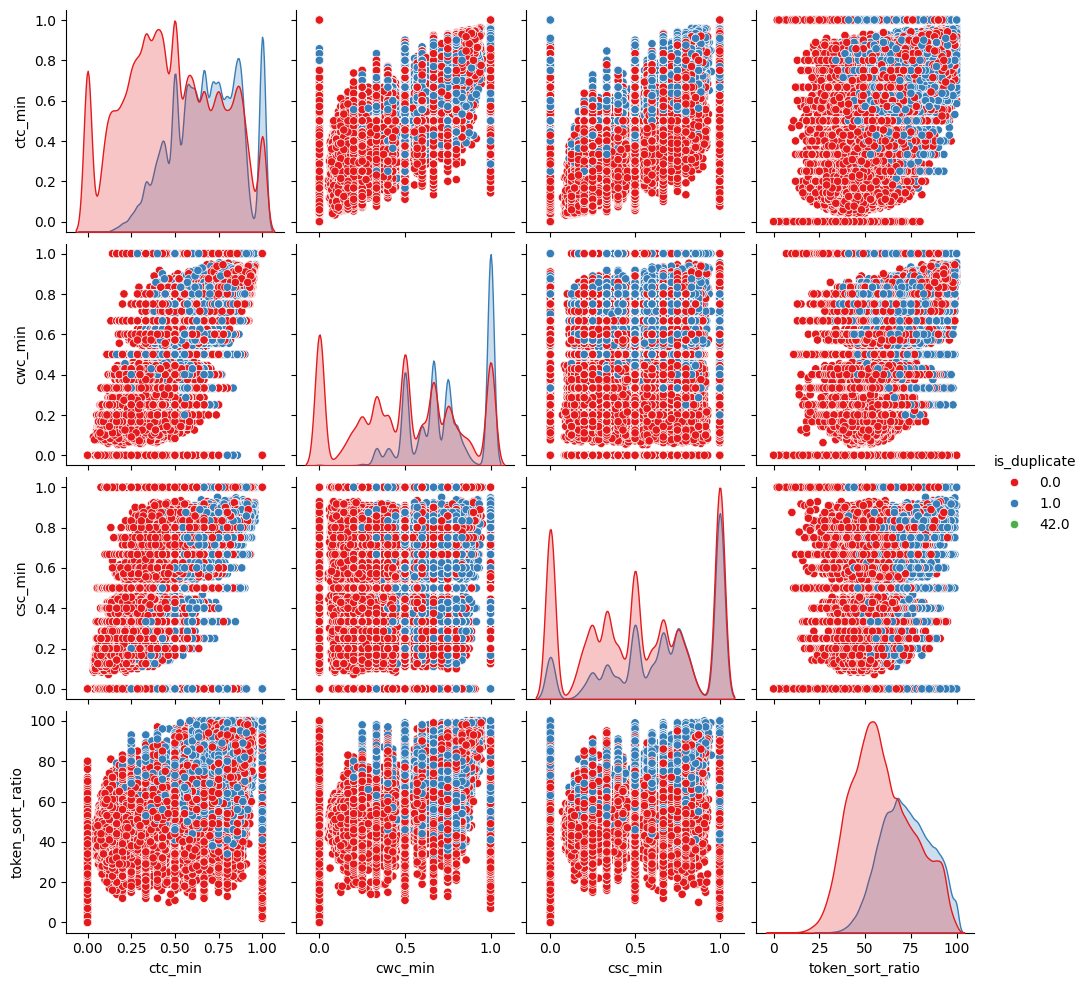

In [ ]:
sns.pairplot(
    df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n],
    hue='is_duplicate',   # Colors based on duplicate vs non-duplicate
    vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'],
    palette='Set1',       # Colorful palette (you can try 'Set2', 'husl', 'coolwarm', etc.)
    diag_kind='kde',      # KDE plot on diagonals for smoother curves
)

plt.show()

"""High token similarity (token_sort_ratio) + high common word ratio (cwc_min, ctc_min) → more likely duplicates.

Low values across these features → more likely non-duplicates.

There is still overlap, so these features alone cannot fully separate duplicates vs non-duplicates, but they are strong indicators."""

C:\Users\Aditya\AppData\Local\Temp\ipykernel_20764\251155342.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_20764\251155342.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


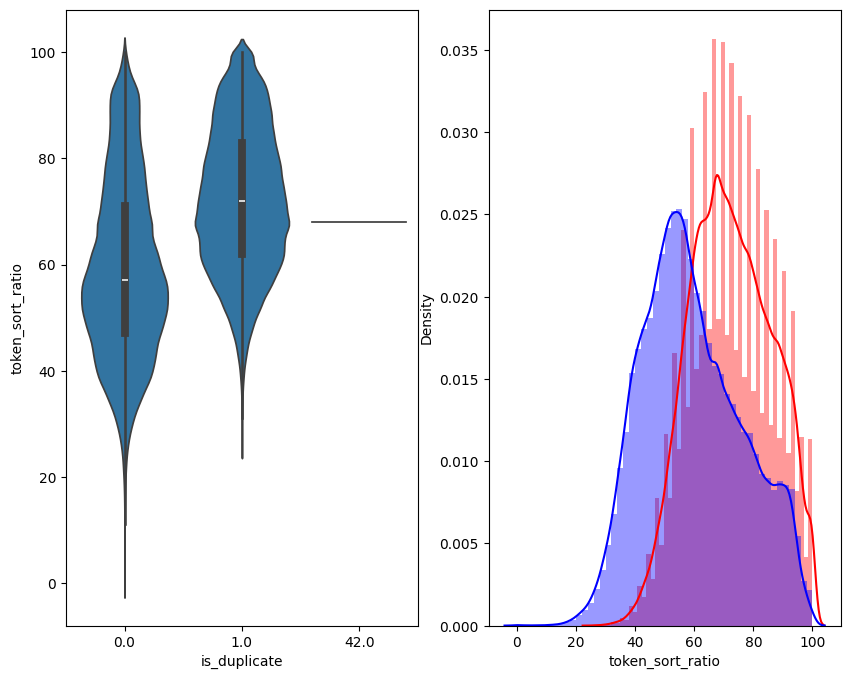

In [6]:
"""How it works

It splits the strings into tokens (words).

Sorts them alphabetically.

Joins them back into strings.

Then applies Levenshtein distance (edit distance) on the sorted strings."""
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()


C:\Users\Aditya\AppData\Local\Temp\ipykernel_20764\2349552373.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_20764\2349552373.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

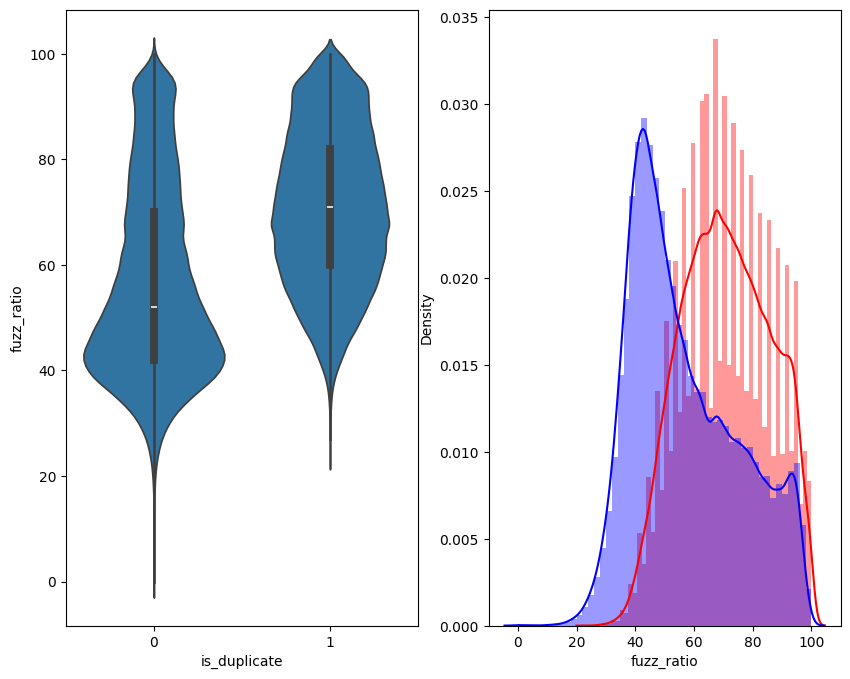

In [19]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()